In [45]:
from google.colab import files
uploaded = files.upload()

Saving titanic.csv.csv to titanic.csv (10).csv


In [46]:
import pandas as pd

df = pd.read_csv("titanic.csv (2).csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [47]:
print(df.head())
print(df.info())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

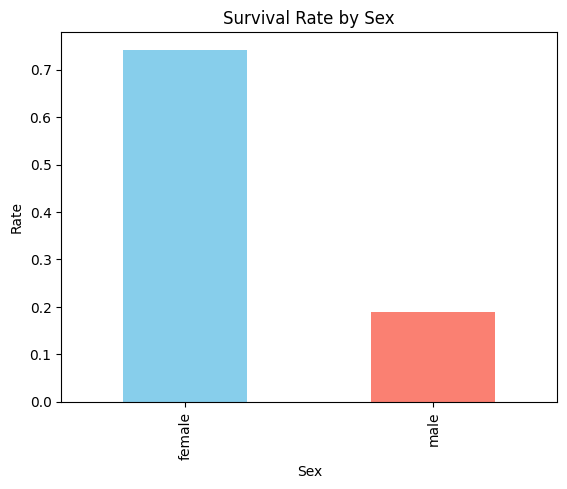

In [48]:
import matplotlib.pyplot as plt

df.groupby("Sex")["Survived"].mean().plot(kind="bar", color=["skyblue", "salmon"])
plt.title("Survival Rate by Sex")
plt.ylabel("Rate")
plt.show()

✅ Data loaded successfully!
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450 

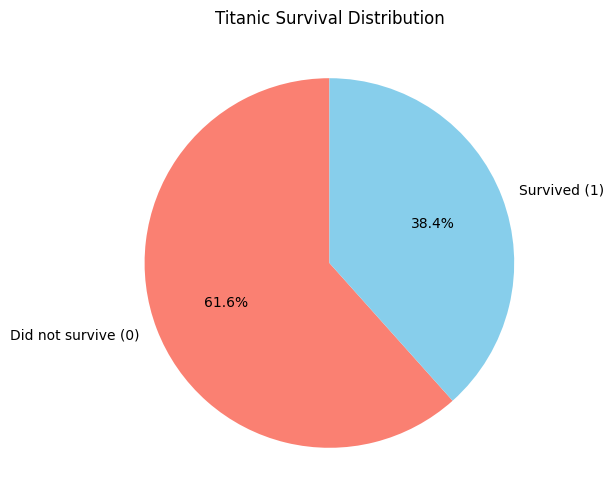

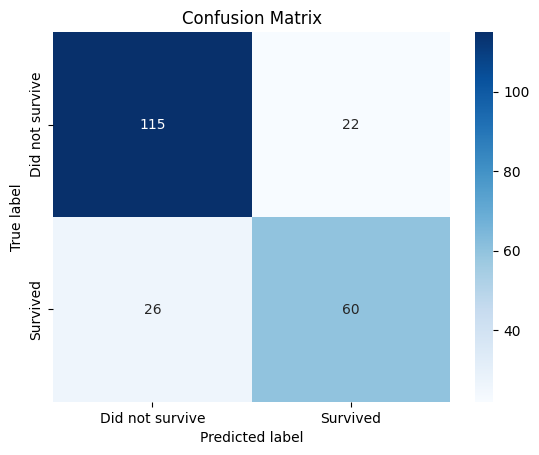

In [49]:
!pip install pandas numpy matplotlib scikit-learn seaborn


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report

df = pd.read_csv("titanic.csv.csv")

print("✅ Data loaded successfully!")
print(df.head())

#  Clean and prepare
df["Age"] = df["Age"].fillna(df["Age"].median())
df["Embarked"] = df["Embarked"].fillna(df["Embarked"].mode()[0])
df["Fare"] = df["Fare"].fillna(df["Fare"].median())

df["SexNum"] = (df["Sex"] == "male").astype(int)
embarked_dummies = pd.get_dummies(df["Embarked"], prefix="Emb", drop_first=True)

df["FamilySize"] = df["SibSp"] + df["Parch"] + 1
df["IsAlone"] = (df["FamilySize"] == 1).astype(int)

X = pd.concat([
    df[["Pclass", "Age", "SibSp", "Parch", "Fare", "SexNum", "FamilySize", "IsAlone"]],
    embarked_dummies
], axis=1)
y = df["Survived"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

model = LogisticRegression(max_iter=2000)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

# Evaluate model
acc = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_proba)
cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("✅ Model Evaluation:")
print(f"Accuracy: {acc:.3f}")
print(f"ROC AUC: {auc:.3f}")
print("\nConfusion Matrix:\n", cm)
print("\nClassification Report:\n", report)

survival_counts = df["Survived"].value_counts().sort_index()
labels = ["Did not survive (0)", "Survived (1)"]

plt.figure(figsize=(6,6))
plt.pie(survival_counts, labels=labels, autopct="%1.1f%%", startangle=90, colors=["salmon", "skyblue"])
plt.title("Titanic Survival Distribution")
plt.show()

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Did not survive", "Survived"], yticklabels=["Did not survive", "Survived"])
plt.title("Confusion Matrix")
plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.show()